<a href="https://colab.research.google.com/github/ceccode/mlbookcamp/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/homework.md



In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Data Import

In [ ]:
usecols = [
  'neighbourhood_group', 'room_type', 'latitude', 'longitude',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365']
 
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv', usecols=usecols)

In [ ]:
print(data.shape)

(48895, 10)


In [ ]:
data.head(10)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [ ]:
df = data.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 3.7+ MB


Mode of the dataframe

In [ ]:
df.mode()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Manhattan,40.71813,-73.95677,Entire home/apt,100.0,1.0,0.0,0.0,1.0,0.0
1,NaN,NaN,-73.95427,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# mode of the specific column neighbourhood_group
df.loc[:,"neighbourhood_group"].mode()


0    Manhattan
dtype: object

**Answer for Question #1 Manhattan**

In [ ]:
df.columns = data.columns.str.lower().str.replace(' ', '_')
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['neighbourhood_group', 'room_type']

In [ ]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.dtypes

neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

neighbourhood_group
['brooklyn' 'manhattan' 'queens' 'staten_island' 'bronx']
5

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['private_room' 'entire_home/apt' 'shared_room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

reviews_per_month
[0.21 0.38 0.   4.64 0.1 ]
938

calculated_host_listings_count
[6 2 1 4 3]
47

availability_365
[365 355 194   0 129]
366



In [ ]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,brooklyn,40.64749,-73.97237,private_room,149,1,9,0.21,6,365
1,manhattan,40.75362,-73.98377,entire_home/apt,225,1,45,0.38,2,355
2,manhattan,40.80902,-73.94190,private_room,150,3,0,0.00,1,365
3,brooklyn,40.68514,-73.95976,entire_home/apt,89,1,270,4.64,1,194
4,manhattan,40.79851,-73.94399,entire_home/apt,80,10,9,0.10,1,0


train, val, test set will be 60%, 20%, 20% of the dataset respectively

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

#Since logistic regression is a binary classification model, y should be a binary variable

y_train_b = (y_train > 152).astype(int)
y_val_b = (y_val > 152).astype(int)
y_test_b = (y_test > 152).astype(int)

del df_train['price']
del df_val['price']
del df_test['price']

Correlation is a statistical technique that shows how two variables are related. 
Pandas dataframe.corr() method is used for creating the correlation matrix. It is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

Values at the diagonal shows the correlation of a variable with itself, hence diagonal shows the correlation 1

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

cor = df_full_train.corr()
cor

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.087077,0.035097,0.019405,-0.019116,-0.018469,0.019113,-0.015367
longitude,0.087077,1.000000,-0.154201,-0.064843,0.060512,0.138059,-0.114354,0.082621
price,0.035097,-0.154201,1.000000,0.039181,-0.048133,-0.050050,0.057003,0.081628
minimum_nights,0.019405,-0.064843,0.039181,1.000000,-0.079131,-0.123522,0.127723,0.146533
number_of_reviews,-0.019116,0.060512,-0.048133,-0.079131,1.000000,0.590518,-0.071874,0.172371
reviews_per_month,-0.018469,0.138059,-0.050050,-0.123522,0.590518,1.000000,-0.045503,0.166633
calculated_host_listings_count,0.019113,-0.114354,0.057003,0.127723,-0.071874,-0.045503,1.000000,0.227129
availability_365,-0.015367,0.082621,0.081628,0.146533,0.172371,0.166633,0.227129,1.000000


The correlation coefficient has values between -1 to 1

* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

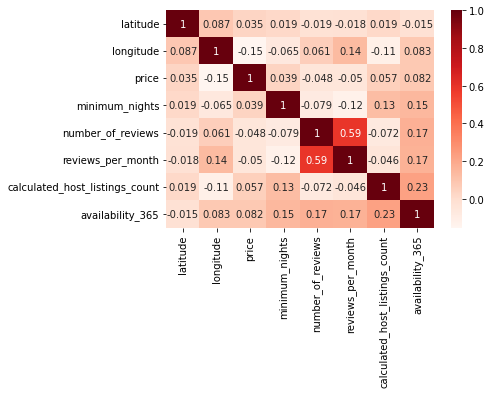

In [ ]:
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Answer for Question #2 number_of_reviews, reviews_per_month**

In [ ]:
above_average = np.where(df_full_train['price'] >= 152, 1, 0)
above_average

array([0, 1, 1, ..., 0, 1, 0])

The Mutual Information is a measure of the similarity between two labels of the same data

In [ ]:
from sklearn.metrics import mutual_info_score

mi_score_ng = mutual_info_score(df_full_train.neighbourhood_group, above_average)
mi_score_ng

0.04628016766358482

In [ ]:
mi_score_rt = mutual_info_score(df_full_train.room_type, above_average)
mi_score_rt

0.14429761662566526

In [ ]:
round(mi_score_ng, 2), round(mi_score_rt, 2), 

(0.05, 0.14)

**Answer for Question #3 room_type**

The class DictVectorizer can be used to convert feature arrays represented as lists of standard Python dict objects to the NumPy/SciPy representation used by scikit-learn estimators.

While not particularly fast to process, Python’s dict has the advantages of being convenient to use, being sparse (absent features need not be stored) and storing feature names in addition to values.

DictVectorizer implements what is called one-of-K or “one-hot” coding for categorical (aka nominal, discrete) features. Categorical features are “attribute-value” pairs where the value is restricted to a list of discrete of possibilities without ordering (e.g. topic identifiers, types of objects, tags, names…).

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

numerical = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
categorical = ['neighbourhood_group', 'room_type']

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

X_train.shape, X_val.shape


((29337, 15), (9779, 15))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train_b)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.intercept_[0]

-0.001871622533386512

In [ ]:
model.coef_[0].round(3)

array([ 0.003,  0.004, -0.137, -0.048, -0.009, -0.235, -0.002,  0.946,
       -0.629, -0.081, -0.003, -0.046,  1.624, -1.342, -0.284])

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.07651517, 0.37754032, 0.59827228, ..., 0.60215496, 0.60870476,
       0.44622299])

Accuracy is the proportion of correct predictions over total predictions

Every estimator or model in Scikit-learn has a score method after being trained on the data, usually X_train, y_train.

When you call score on classifiers like LogisticRegression, RandomForestClassifier, etc. the method computes the accuracy score by default (accuracy is #correct_preds / #all_preds). By default, the score method does not need the actual predictions

In [ ]:
model.score(X_val, y_test_b)

0.5784845076183659

In [ ]:
round(0.5784845076183659, 2)

0.58

Answer for Question #4 0.58

In [ ]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'availability_365': 0.003,
 'calculated_host_listings_count': 0.004,
 'latitude': -0.137,
 'longitude': -0.048,
 'minimum_nights': -0.009,
 'neighbourhood_group=bronx': -0.235,
 'neighbourhood_group=brooklyn': -0.002,
 'neighbourhood_group=manhattan': 0.946,
 'neighbourhood_group=queens': -0.629,
 'neighbourhood_group=staten_island': -0.081,
 'number_of_reviews': -0.003,
 'reviews_per_month': -0.046,
 'room_type=entire_home/apt': 1.624,
 'room_type=private_room': -1.342,
 'room_type=shared_room': -0.284}

In [ ]:
small = ['neighbourhood_group', 'number_of_reviews', 'reviews_per_month', 'room_type']
df_train[small].iloc[:10].to_dict(orient='records')

[{'neighbourhood_group': 'queens',
  'number_of_reviews': 30,
  'reviews_per_month': 0.32,
  'room_type': 'entire_home/apt'},
 {'neighbourhood_group': 'brooklyn',
  'number_of_reviews': 2,
  'reviews_per_month': 0.16,
  'room_type': 'private_room'},
 {'neighbourhood_group': 'brooklyn',
  'number_of_reviews': 33,
  'reviews_per_month': 2.75,
  'room_type': 'entire_home/apt'},
 {'neighbourhood_group': 'brooklyn',
  'number_of_reviews': 1,
  'reviews_per_month': 0.12,
  'room_type': 'private_room'},
 {'neighbourhood_group': 'brooklyn',
  'number_of_reviews': 0,
  'reviews_per_month': 0.0,
  'room_type': 'private_room'},
 {'neighbourhood_group': 'manhattan',
  'number_of_reviews': 1,
  'reviews_per_month': 0.04,
  'room_type': 'entire_home/apt'},
 {'neighbourhood_group': 'manhattan',
  'number_of_reviews': 9,
  'reviews_per_month': 0.82,
  'room_type': 'entire_home/apt'},
 {'neighbourhood_group': 'manhattan',
  'number_of_reviews': 1,
  'reviews_per_month': 0.08,
  'room_type': 'entire_hom

In [ ]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [ ]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [ ]:
dv_small.get_feature_names()

['neighbourhood_group=bronx',
 'neighbourhood_group=brooklyn',
 'neighbourhood_group=manhattan',
 'neighbourhood_group=queens',
 'neighbourhood_group=staten_island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=entire_home/apt',
 'room_type=private_room',
 'room_type=shared_room']

In [ ]:
X_train_small = dv_small.transform(dicts_train_small)

In [ ]:
model_small = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model_small.fit(X_train_small, y_train_b)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
w0 = model_small.intercept_[0]
w0

-1.570099903607492

In [ ]:
w = model_small.coef_[0]
w.round(3)

array([-1.197, -0.096,  0.993, -0.629, -0.603, -0.002, -0.003,  1.334,
       -1.438, -1.428])

In [ ]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'neighbourhood_group=bronx': -1.197,
 'neighbourhood_group=brooklyn': -0.096,
 'neighbourhood_group=manhattan': 0.993,
 'neighbourhood_group=queens': -0.629,
 'neighbourhood_group=staten_island': -0.603,
 'number_of_reviews': -0.002,
 'reviews_per_month': -0.003,
 'room_type=entire_home/apt': 1.334,
 'room_type=private_room': -1.438,
 'room_type=shared_room': -1.428}

Accuracy is the proportion of correct predictions over total predictions

In [ ]:
X_val_small = dv_small.transform(dicts_val_small)

In [ ]:
model_small.score(X_val_small, y_test_b)

0.5876879026485325